In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../../framingham_heart_study.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
data.shape

(4240, 16)

In [6]:
pd.isnull(data).values.any()

True

In [7]:
pd.isnull(data).values.sum()

645

In [8]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
# new_data = data.dropna()
new_data = data.fillna(method='ffill', axis=1)

In [12]:
new_data.isnull().values.any()

False

In [13]:
X = new_data.drop(['TenYearCHD'], axis=1)
y= new_data['TenYearCHD']

In [19]:
X.shape, y.shape

((4240, 15), (4240,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
# standard scaling
scaler = StandardScaler()

In [23]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [24]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [53]:
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

In [54]:
x_train.shape, x_test.shape

((2968, 1), (1272, 1))

In [55]:
# svm classifier
svm_clf = SVC(kernel="linear")

# before dimension reduction
svm_clf.fit(x_train_lda, y_train)

SVC(kernel='linear')

In [56]:
y_pred = svm_clf.predict(x_test_lda)

In [61]:
print(metrics.accuracy_score(y_test, y_pred))

0.8459119496855346


In [63]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1076
         1.0       0.00      0.00      0.00       196

    accuracy                           0.85      1272
   macro avg       0.42      0.50      0.46      1272
weighted avg       0.72      0.85      0.78      1272



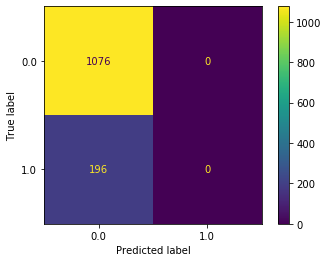

In [69]:
from sklearn.metrics import plot_confusion_matrix 
print(plot_confusion_matrix(svm_clf, x_test_lda, y_test))